In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
passmarks = 40

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [12]:
df['race/ethnicity'].value_counts().sort_index()

group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

In [13]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [14]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [15]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [16]:
df['math score'].value_counts()

65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math score, Length: 81, dtype: int64

In [17]:
df['reading score'].value_counts()

72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: reading score, Length: 72, dtype: int64

In [18]:
df['writing score'].value_counts()

74    35
70    33
68    31
73    28
80    27
      ..
28     1
35     1
19     1
22     1
23     1
Name: writing score, Length: 77, dtype: int64

***PROBLEM STATEMENTS***

**1.0 Find out math score for overall class..?**

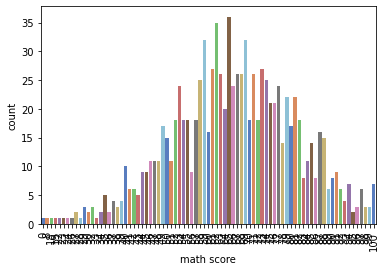

In [19]:
p = sns.countplot(x = 'math score', data = df, palette = 'muted')
_ = plt.xticks(rotation = 90)

**2.0 How many students passed in maths exam..?**

In [20]:
df['maths_passout'] = np.where(df['math score']<passmarks, 'F', 'P')
df['maths_passout'].value_counts()

P    960
F     40
Name: maths_passout, dtype: int64

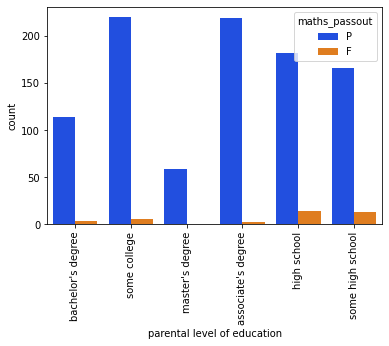

In [21]:
p = sns.countplot(x = 'parental level of education', data = df, hue = 'maths_passout', palette = 'bright')
_ = plt.xticks(rotation = 90)

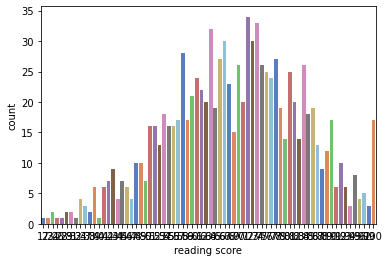

In [22]:
sns.countplot(x = 'reading score', data = df, palette = 'muted')
plt.show()

**3.0 How many students passed in reading...?**

In [23]:
df['reading_passout'] = np.where(df['reading score']<passmarks, 'F', 'P')
df['reading_passout'].value_counts()

P    974
F     26
Name: reading_passout, dtype: int64

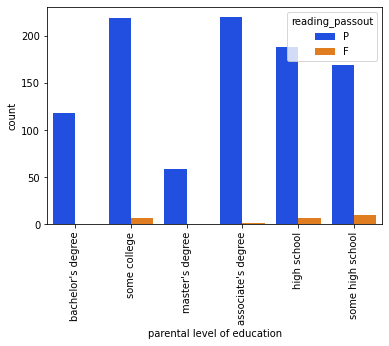

In [24]:
p = sns.countplot(x = 'parental level of education', data = df, hue = 'reading_passout', palette = 'bright')
_ = plt.xticks(rotation = 90)

**Let us explore writing data**

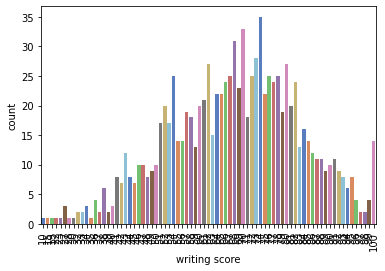

In [25]:
p = sns.countplot(x = 'writing score', data = df, palette = 'muted')
_ = plt.xticks(rotation = 90)

**4.0 How many students passed writing..?**

In [26]:
df['writing_passout'] = np.where(df['writing score']<passmarks, 'F', 'P')
df['writing_passout'].value_counts()

P    968
F     32
Name: writing_passout, dtype: int64

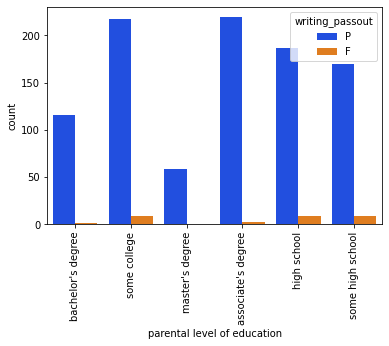

In [27]:
p = sns.countplot(x = 'parental level of education', data = df, hue = 'writing_passout', palette = 'bright')
_ = plt.xticks(rotation = 90)

**5.0 Let us check who are all passed over all the subjects**

In [28]:
df['overall_passout'] = df.apply(lambda x : 'F' if x['maths_passout']== 'F' or x['writing_passout']== 'F' or x['reading_passout']== 'F' else 'P', axis = 1)
df.overall_passout.value_counts()

P    949
F     51
Name: overall_passout, dtype: int64

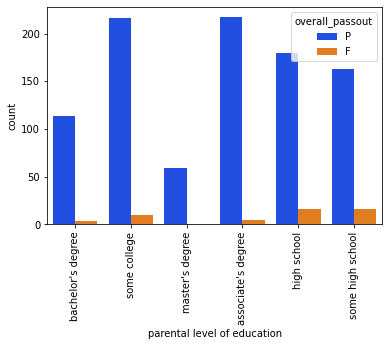

In [29]:
p = sns.countplot(x = 'parental level of education', data = df, hue = 'overall_passout', palette = 'bright')
_ = plt.xticks(rotation = 90)

**5.0 Find the percentage of marks**

In [30]:
df['Total_Marks'] = df['math score'] + df['reading score'] + df['writing score']
df['Percentage'] = df['Total_Marks'] / 3

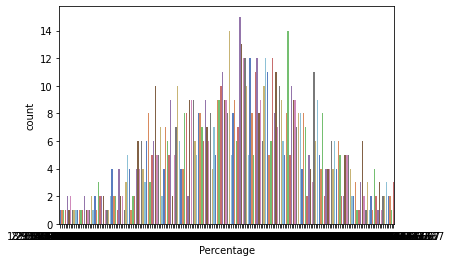

In [31]:
p = sns.countplot(x = 'Percentage', data = df, palette = 'muted')
_ = plt.xticks(rotation =0)

**6.0 Let us assign Grades**

In [33]:
def GetGrades(Percentage, overall_passout):
    if(overall_passout == 'F'):
        return 'F'
    if(Percentage>=80):
        return 'A'
    if(Percentage>=70):
        return 'B'
    if(Percentage>=60):
        return 'C'
    if(Percentage>=50):
        return 'D'
    if(Percentage>=40):
        return 'E'
    else:
        return 'F'
    
df['Grades'] = df.apply(lambda x : GetGrades(x['Percentage'], x['overall_passout']), axis = 1)
df['Grades'].value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grades, dtype: int64

**7.0We will plot the grades obtained in a order**

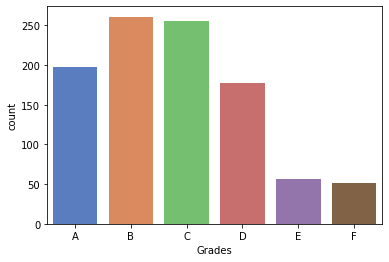

In [37]:
p = sns.countplot(x = 'Grades', data = df, order = ['A', 'B', 'C', 'D', 'E', 'F'], palette = 'muted')
_ = plt.xticks(rotation = 0)
plt.show()

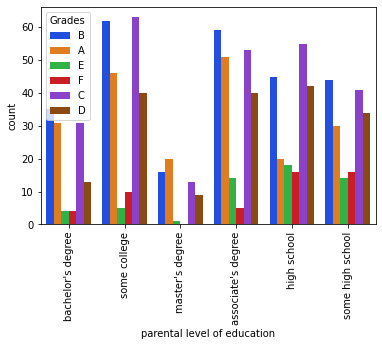

In [38]:
p = sns.countplot(x = 'parental level of education', data = df, hue = 'Grades', palette = 'bright')
_ = plt.xticks(rotation = 90)